In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#cuantas imagenes tengo y cual es su dimension
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

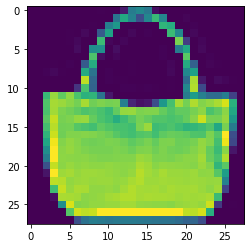

In [ ]:
#el data set es de ropa
plt.imshow(train_images[100])

In [ ]:
train_images = train_images.astype('float32') / 255 #el limite de pixeles es 255
test_images = test_images.astype('float32') / 255

In [ ]:
#se va a hacer un reshape
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [ ]:
#esta linea es para estandarizar los datos dadas las dimensiones que se tienen 
train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

In [ ]:
#vamos a crear nuestro modelo de datos 
model = tf.keras.Sequential()
#agregando capas
model.add(Conv2D(filters=64, kernel_size = 2 , padding = 'same', activation='relu', input_shape=(28,28,1)))#capá de comvolucion
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size = 2 , padding = 'same', activation='relu'))#capá de comvolucion
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [ ]:
from tensorflow.python import metrics
#Compilar y entrenar nuestro modelo
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics='accuracy')

In [ ]:
model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 14s 5ms/step - loss: 0.5703 - accuracy: 0.7916
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3991 - accuracy: 0.8571
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3588 - accuracy: 0.8722
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3416 - accuracy: 0.8774
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3290 - accuracy: 0.8840
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3249 - accuracy: 0.8846
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3213 - accuracy: 0.8863
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3205 - accuracy: 0.8882
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3189 - accuracy: 0.8870
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3201 - accuracy: 0.888

In [ ]:
model.evaluate(test_images, test_labels, verbose=0)

[0.28964468836784363, 0.9016000032424927]

##Early stopping y Checkpoints

In [ ]:
#early stopping: ayuda a detener la red una vez que esta empieza a diverge
#la paciencia (patience) pondra el limite si es muy baja o alta afectara en
#si se detiene o no en cuanto a las epocas

early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
model.fit(train_images,
          train_labels, 
          batch_size=64,
          callbacks=[early],
          epochs=10)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3225 - accuracy: 0.8893
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3241 - accuracy: 0.8870


In [ ]:
#Checkpoint
checkpoint= tf.keras.callbacks.ModelCheckpoint(filepath='red_convu_uno.hdf5',
                                             verbose= 1,
                                             monitor= 'accuracy',
                                             save_best_only= True)
model.fit(train_images,
          train_labels, 
          batch_size=64,
          callbacks=[checkpoint],
          epochs=10)

Epoch 1/10
933/938 [============================>.] - ETA: 0s - loss: 0.3265 - accuracy: 0.8865
Epoch 1: accuracy improved from -inf to 0.88648, saving model to red_convu_uno.hdf5
938/938 [==============================] - 5s 5ms/step - loss: 0.3264 - accuracy: 0.8865
Epoch 2/10
933/938 [============================>.] - ETA: 0s - loss: 0.3286 - accuracy: 0.8878
Epoch 2: accuracy improved from 0.88648 to 0.88782, saving model to red_convu_uno.hdf5
938/938 [==============================] - 5s 5ms/step - loss: 0.3286 - accuracy: 0.8878
Epoch 3/10
937/938 [============================>.] - ETA: 0s - loss: 0.3262 - accuracy: 0.8880
Epoch 3: accuracy improved from 0.88782 to 0.88802, saving model to red_convu_uno.hdf5
938/938 [==============================] - 5s 5ms/step - loss: 0.3263 - accuracy: 0.8880
Epoch 4/10
927/938 [============================>.] - ETA: 0s - loss: 0.3317 - accuracy: 0.8863
Epoch 4: accuracy did not improve from 0.88802
938/938 [==============================] - 4

In [ ]:
#es importante notar que este check point deja un archivo con los mejores pesos
model2 = model
model2.load_weights('/content/red_convu_uno.hdf5')
#esta linea es la que tiene el archivo con los pesos


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3758 - accuracy: 0.9004


[0.375802218914032, 0.9003999829292297]

##Erly stoping & checkpoints

In [ ]:
#nos ayuda a checar si una metrica no esta mejorando y si no lo hace detiene el entrenamiento segun nuestros parametros
early = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience=1 )
model.fit(train_images, train_labels, batch_size=64, callbacks=[early],epochs = 10 )

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3287 - accuracy: 0.8872
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3282 - accuracy: 0.8873
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3339 - accuracy: 0.8856


In [ ]:
#ahora ocupemos otro callback
#'hdf5' es la extencion para los pesos del modelo 
#'save_best_only' es para solo se guarde los pesos del mejor modelo
tf.keras.callbacks.ModelCheckpoint(filepath='red_convu_uno.hdf5',
                                   verbose = 1,
                                   monitor = 'accuracy',
                                   save_best_only = True)